In [85]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [12]:
# READ THE TABLES AS DATA FRAMES
df1 = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\account.csv', sep=';') # account table
df2 = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\account_date_session1.csv', sep=';')
df3 = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\account_date_session2.csv', sep=';')
df4 = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\iap_purchase.csv', sep=';') # iap_purchase table

In [13]:
df2 = pd.concat([df2, df3]) # account_date_session

In [15]:
df1

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,02/03/2016 17:11:00,"iPhone6,2",iOS,GB,1
1,4308483975,02/03/2016 20:57:46,MIDC147PJ,Android,FR,2
2,17193137415,02/03/2016 13:52:17,SM-G360F,Android,IT,2
3,21488104920,02/03/2016 12:43:28,H60-L01,Android,CN,8
4,21488107995,02/03/2016 17:20:12,GT-I9500,Android,RU,2
...,...,...,...,...,...,...
112787,51554039942,07/08/2016 13:32:49,KOPO L128,Android,CN,4
112788,51554090637,11/08/2016 22:20:27,SM-G3608,Android,CN,15
112789,51554102314,12/08/2016 21:10:21,"iPhone8,4",iOS,US,1
112790,51554116380,14/08/2016 1:37:14,SM-G935F,Android,HR,2


In [16]:
df2

,account_id,date,session_count,session_duration_sec
0,68730811144,01/01/2016,1,47
1,68730812806,01/01/2016,1,204
2,68730829426,01/01/2016,12,4703
3,68730829426,02/01/2016,9,4676
4,68730829426,03/01/2016,9,2271
...,...,...,...,...
650394,55850490316,30/12/2016,1,392
650395,55850515956,30/12/2016,1,564
650396,55850515956,31/12/2016,9,3268
650397,55850519336,31/12/2016,9,4043


In [36]:
print(df2.dtypes)

account_id               int64
date                    object
session_count            int64
session_duration_sec     int64
dtype: object


In [61]:
df2['date'] = pd.to_datetime(df2['date'], format="%d/%m/%Y")

In [62]:
print(df2.dtypes)

account_id                       int64
date                    datetime64[ns]
session_count                    int64
session_duration_sec             int64
dtype: object


In [18]:
df4

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
0,30077202816,26/03/2016 23:59:59,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
1,30077202816,31/05/2016 11:24:37,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0
2,21487283560,13/02/2016 3:40:29,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
3,21487152816,28/02/2016 0:53:27,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
4,8602037685,11/02/2016 1:03:05,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
...,...,...,...,...,...
9904,51552698769,23/07/2016 3:25:59,99a9e0e63efa2fdce8fc8de74c66cea9,184,1
9905,51552698769,25/07/2016 5:57:34,99a9e0e63efa2fdce8fc8de74c66cea9,184,1
9906,51552698769,14/11/2016 1:01:11,efd2eebfdc98b55f9e6b45915d56f7ac,36,1
9907,51552698769,02/12/2016 13:43:31,efd2eebfdc98b55f9e6b45915d56f7ac,36,1


In [112]:
# CREATE TABLE OF DAU ALONG THE TIME AND PREPARATION TO USE IT
df5 = df2.groupby('date',sort=False)[['session_count']].count()
df5 = df5.rename(columns={'session_count': 'DAU'})
df5

,DAU
date,
2016-01-01,1083
2016-01-02,1558
2016-01-03,1872
2016-01-04,1884
2016-01-05,2068
...,...
2016-12-27,4421
2016-12-28,4436
2016-12-29,4493


In [113]:
df5 = df5.stack()
df5

date           
2016-01-01  DAU    1083
2016-01-02  DAU    1558
2016-01-03  DAU    1872
2016-01-04  DAU    1884
2016-01-05  DAU    2068
                   ... 
2016-12-27  DAU    4421
2016-12-28  DAU    4436
2016-12-29  DAU    4493
2016-12-30  DAU    4669
2016-12-31  DAU    4873
Length: 366, dtype: int64

In [114]:
df5 = df5.to_frame(name='DAU')
df5

,,DAU
date,,
2016-01-01,DAU,1083
2016-01-02,DAU,1558
2016-01-03,DAU,1872
2016-01-04,DAU,1884
2016-01-05,DAU,2068
...,...,...
2016-12-27,DAU,4421
2016-12-28,DAU,4436
2016-12-29,DAU,4493


In [115]:
df5 = df5.reset_index()
df5 = df5.rename(columns={'level_1': 'DAU'})
df5

,date,DAU,DAU
0,2016-01-01,DAU,1083
1,2016-01-02,DAU,1558
2,2016-01-03,DAU,1872
3,2016-01-04,DAU,1884
4,2016-01-05,DAU,2068
...,...,...,...
361,2016-12-27,DAU,4421
362,2016-12-28,DAU,4436
363,2016-12-29,DAU,4493
364,2016-12-30,DAU,4669


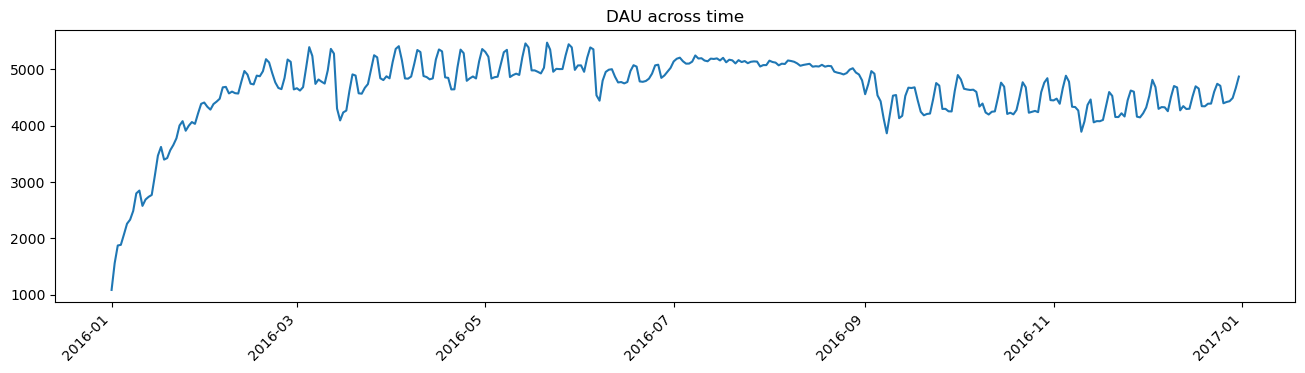

In [116]:
df5.plot(x='date', y='DAU', kind='line', rot=45, legend=None, 
        title='DAU across time', xlabel='', fontsize=10, figsize=(16,4));

<Axes: >

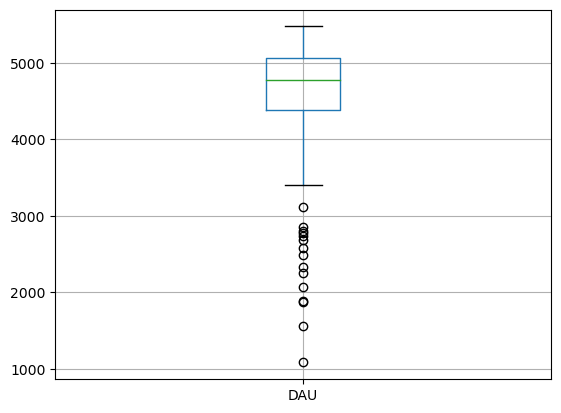

In [117]:
df5.boxplot(column = ['DAU'])